In [ ]:
#Esto es un programa de analisis de sentimientos
!pip install textblob spacy vaderSentiment nltk wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
#Importar las librerias
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load file and extract keys from twitter
from google.colab import files
uploaded = files.upload()

In [ ]:
#Get the data from the file
#store the csv file to some variable
df = pd.read_csv('stock_tweets.csv')
print(df.head())

In [ ]:
# Seleccionar solo la columna de texto y eliminar filas vacías
df = df[['Tweet']].dropna()


In [ ]:
# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Eliminar menciones
    text = re.sub(r'#', '', text)  # Eliminar hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Eliminar RT
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Eliminar URLs
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = text.lower()  # Convertir a minúsculas
    return text

In [ ]:
# Aplicar limpieza a la columna de texto
df['Cleaned_Text'] = df['Tweet'].apply(clean_text)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Función para obtener subjetividad
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Función para obtener polaridad
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# Aplicar análisis de sentimientos
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'

In [ ]:
print(df.columns)

Index(['Tweet', 'Cleaned_Text'], dtype='object')


In [ ]:
df['Polarity'] = df['Cleaned_Text'].apply(get_polarity)
df['Subjectivity'] = df['Cleaned_Text'].apply(get_subjectivity)
df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

In [ ]:
# Mostrar los primeros resultados
print(df.head())

                                               Tweet  \
0  Mainstream media has done an amazing job at br...   
1  Tesla delivery estimates are at around 364k fr...   
2  3/ Even if I include 63.0M unvested RSUs as of...   
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4  @RealDanODowd @Tesla Stop trying to kill kids,...   

                                        Cleaned_Text  Polarity  Subjectivity  \
0  mainstream media has done an amazing job at br...  0.600000      0.900000   
1  tesla delivery estimates are at around 364k fr...  0.000000      0.000000   
2  3 even if i include 630m unvested rsus as of 6...  0.018182      0.277273   
3     hahaha why are you still trying to stop tes...  0.066667      0.433333   
4    stop trying to kill kids you sad deranged ol... -0.200000      0.600000   

  Sentiment  
0  Positivo  
1   Neutral  
2  Positivo  
3  Negativo  
4  Negativo  


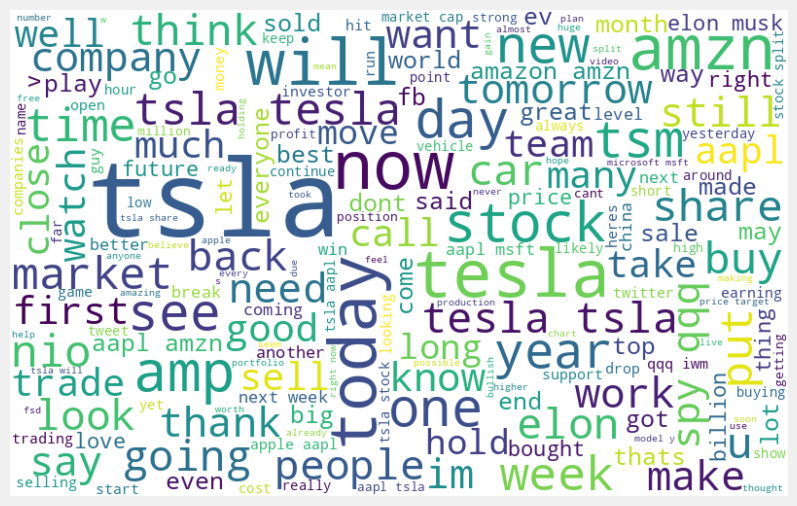

In [ ]:
# Generar una nube de palabras
all_words = ' '.join([text for text in df['Cleaned_Text']])
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

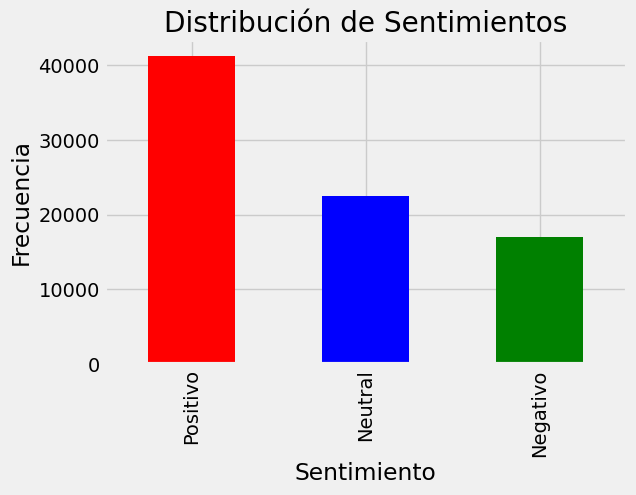

In [ ]:
# Graficar distribución de análisis de sentimientos
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

Conteo real de comentarios por sentimiento:
Sentiment
Positivo    41300
Neutral     22468
Negativo    17025
Name: count, dtype: int64

📊 **Porcentaje de comentarios por sentimiento:**
Positive: 0.00% (0 comentarios)
Neutral: 27.81% (22468 comentarios)
Negative: 0.00% (0 comentarios)


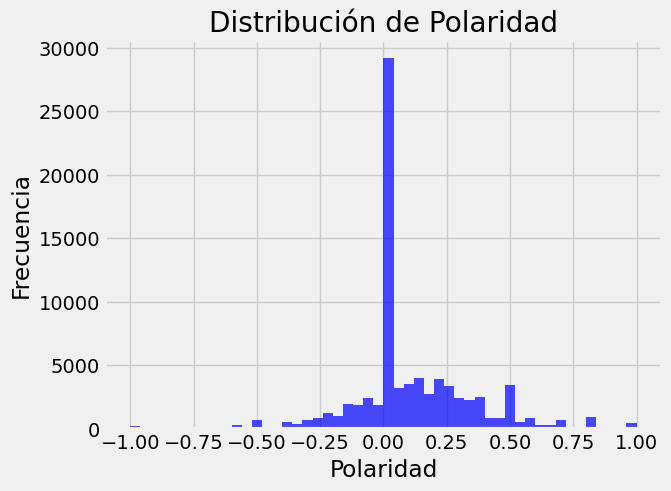

In [ ]:
# Contar el número de cada categoría de sentimiento
sentiment_counts = df['Sentiment'].value_counts()

# Mostrar conteo real antes de calcular porcentajes
print("Conteo real de comentarios por sentimiento:")
print(sentiment_counts)

# Asegurar que todas las categorías estén presentes
sentiment_categories = ['Positive', 'Neutral', 'Negative']
sentiment_counts = sentiment_counts.reindex(sentiment_categories, fill_value=0)

# Calcular porcentajes
total = len(df)
percentages = (sentiment_counts / total) * 100

# Mostrar porcentajes
print("\n📊 **Porcentaje de comentarios por sentimiento:**")
for sentiment in sentiment_categories:
    print(f"{sentiment}: {percentages[sentiment]:.2f}% ({sentiment_counts[sentiment]} comentarios)")

# Verificar distribución de polaridades
plt.hist(df['Polarity'], bins=50, color='blue', alpha=0.7)
plt.title("Distribución de Polaridad")
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
#Print all of the negative tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'], ascending='Faslse')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j=j+1


In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue')

  plt.title('Sentiment Analisys')
  plt.xlabel('polarity')
  plt.ylabel('subjectivity')
  plt.show

In [ ]:
#Get the porcentage of positive tweets
ptweets=df[df.Analysis == 'positive']
ptweets=ptweets['Tweets']
round( ()ptweets.shape[0] / df.shape[0]*100 , 1)

In [ ]:
#Get the porcentage of negative tweets
ntweets=df[df.Analysis == 'negative']
ntweets=ntweets['Tweets']
round( ()ntweets.shape[0] / df.shape[0]*100 , 1)

In [ ]:
#Show thw value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analisys')
plt.xlabel('sentiment')
plt.ylabel('counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show